In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names




['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = data.target_names
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)



In [9]:
from sklearn.neural_network import MLPClassifier  
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

mlp = make_pipeline(TfidfVectorizer(),  MLPClassifier(hidden_layer_sizes=(10), max_iter=1000,solver = 'lbfgs'))

mlp.fit(train.data, train.target)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

             precision    recall  f1-score   support

          0       0.67      0.60      0.64       319
          1       0.54      0.77      0.64       389
          2       0.70      0.56      0.62       394
          3       0.54      0.65      0.59       392
          4       0.75      0.66      0.70       385
          5       0.84      0.58      0.69       395
          6       0.61      0.64      0.63       390
          7       0.77      0.79      0.78       396
          8       0.45      0.90      0.60       398
          9       0.90      0.74      0.81       397
         10       0.74      0.89      0.81       399
         11       0.77      0.80      0.78       396
         12       0.65      0.47      0.54       393
         13       0.83      0.54      0.66       396
         14       0.87      0.72      0.78       394
         15       0.87      0.74      0.80       398
         16       0.74      0.59      0.66       364
         17       0.88      0.65      0.75   

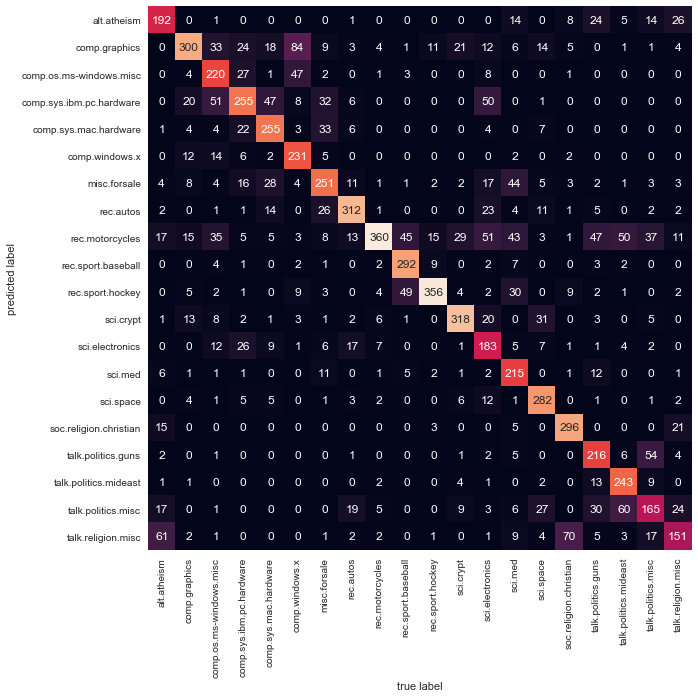

In [10]:
labels_mlp = mlp.predict(test.data)


from sklearn.metrics import confusion_matrix, classification_report

fig, ax = plt.subplots(figsize=(10,10)) 

mat = confusion_matrix(test.target, labels_mlp)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names,ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');



print(classification_report(test.target, labels_mlp))  



In [11]:
def predict_category(s, train=train, model=mlp):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [12]:
# Type your own words
# For example

A= 'i need resistors for this project '


predict_category(A)


'comp.sys.ibm.pc.hardware'